Team ID	        :PNT2022TMID42258
Project Name	:Project – REAL TIME COMMUNICATION POWERED BY AI FOR SPECIALLY ABLED

Image preprocessing

In [28]:
pwd

'/home/wsuser/work'

In [29]:
!pip install keras==2.7.0

In [30]:
!pip install tensorflow==2.5.0

Import ImageDataGenerator Library And Configure It

In [31]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jo4gIWjPHHhcIDJdqWh9bGhNZUev1BSftWVW5f8TxCix',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'aicode-donotdelete-pr-zp35pf5y2lzdrf'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [32]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/training_set', target_size = (64, 64), batch_size = 300, class_mode = 'categorical', color_mode = 'grayscale')
x_test = test_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set', target_size = (64, 64), batch_size = 300, class_mode = 'categorical', color_mode = 'grayscale')

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [35]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [37]:
model = Sequential()

Add The Convolution Layer

In [38]:
model.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))

Add The Pooling Layer

In [39]:
model.add(MaxPooling2D(pool_size = (2,2)))

Add The Flatten Layer

In [40]:
model.add(Flatten())

Adding The Dense Layers

In [41]:
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 9, activation = 'softmax'))

Compile The Model

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               15745536  
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
Total params: 15,750,473
Trainable params: 15,750,473
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fit And Save The Model

In [44]:
model.fit(x_train, steps_per_epoch = 24, epochs = 10, validation_data = x_test, validation_steps = 40)

Epoch 1/10
24/24 [==============================] - 31s 1s/step - loss: 0.9221 - accuracy: 0.7138 - val_loss: 0.3336 - val_accuracy: 0.9040
Epoch 2/10
24/24 [==============================] - 28s 1s/step - loss: 0.2259 - accuracy: 0.9328
Epoch 3/10
24/24 [==============================] - 28s 1s/step - loss: 0.1128 - accuracy: 0.9704
Epoch 4/10
24/24 [==============================] - 28s 1s/step - loss: 0.0722 - accuracy: 0.9803
Epoch 5/10
24/24 [==============================] - 28s 1s/step - loss: 0.0516 - accuracy: 0.9862
Epoch 6/10
24/24 [==============================] - 28s 1s/step - loss: 0.0433 - accuracy: 0.9885
Epoch 7/10
24/24 [==============================] - 30s 1s/step - loss: 0.0293 - accuracy: 0.9940
Epoch 8/10
24/24 [==============================] - 29s 1s/step - loss: 0.0205 - accuracy: 0.9953
Epoch 9/10
24/24 [==============================] - 29s 1s/step - loss: 0.0180 - accuracy: 0.9951
Epoch 10/10
24/24 [==============================] - 28s 1s/step - loss: 0.0

In [45]:
model.save('aslpng1.h5')

In [46]:
!tar -zcvf image.Classification.model_new.tgz aslpng1.h5

aslpng1.h5


In [47]:
ls -1

aslpng1.h5
Dataset/
image.Classification.model_new.tgz


In [48]:
!pip install watson_machine_learning_client --upgrade

In [49]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    #"apikey": "sqLVTXSP3nnAKfzJ1rKRKCpNzS_XZ8_HXa9FRwV7BvOP"
    "apikey":  "onrJcGGyt_7jdTqE2t4UxrWVimZMQqB6FXXqs8bpFO0D"
}
client = APIClient(url_credentials)

In [50]:
client = APIClient(url_credentials)

In [51]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [52]:
space_uid = guid_from_space_name(client, 'imageclassification')
print("space UID = " + space_uid)

space UID = 83bc0c10-2eea-43e5-9915-96f0fb28b425


In [53]:
client.set.default_space(space_uid)

'SUCCESS'

In [54]:
client.software_specifications.list(800)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [56]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [57]:
#store the model
model_details = client.repository.store_model(model='image.Classification.model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [58]:
model_id

'd08112e3-633c-4efd-818e-efd190310ed7'

In [64]:
client.repository.download(model_id,"my_model.tar.gz")

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:
pwd

'/home/wsuser/work'

In [66]:
model = load_model('aslpng1.h5')

In [110]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jo4gIWjPHHhcIDJdqWh9bGhNZUev1BSftWVW5f8TxCix',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'aicode-donotdelete-pr-zp35pf5y2lzdrf'
object_key = 'C.jpg'

streaming_body_6 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [111]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/100.png")

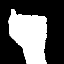

In [112]:
img

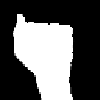

In [134]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"/home/wsuser/work/Dataset/test_set/A/100.png",target_size = (100,100))
img

In [135]:
from skimage.transform import resize
def detect(frame):
  img=image.img_to_array(frame)
  img = resize(frame, (64,64,1))
  img = np.expand_dims(img, axis = 0)
  pred=np.argmax(model.predict(img))
  op=['A','B','C','D','E','F','G','H','I']
  print('The predicted letter is',op[pred])

In [136]:
import sys
sys.setrecursionlimit(1500)

In [141]:
!pip install opencv-python
import cv2
frame = cv2.imread(r'/home/wsuser/work/Dataset/test_set/A/100.png')
data = detect(frame)

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [117]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [80]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [118]:
img2=image.load_img(r"/home/wsuser/work/Dataset/test_set/C/102.png")

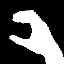

In [119]:
img2

In [120]:
x=image.img_to_array(img)

In [121]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [122]:
x=np.expand_dims(x,axis=1)

In [123]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       ...,


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [133]:
y=np.argmax(model.predict(x),axis=0)

ValueError: in user code:

    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (32, 1, 64, 3)


In [128]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [129]:
index=['A','B','C','D','E','F','G','H','I']

In [130]:
index[y[0]]

NameError: name 'y' is not defined

In [106]:
from skimage.transform import resize
def detect(frame):
  img=image.img_to_array(frame)
  img = resize(frame, (64,64,1))
  img = np.expand_dims(img, axis = 0)
  pred=np.argmax(model.predict(img))
  op=['A','B','C','D','E','F','G','H','I']
  print('The predicted letter is',op[pred])

In [107]:
import sys
sys.setrecursionlimit(1500)

In [108]:
frame = cv2.imread(r'/home/wsuser/work/Dataset/test_set/A/100.png')
data = detect(frame)

NameError: name 'cv2' is not defined